In [26]:
import pandas
from pandas import DataFrame
%matplotlib inline
# param_1 = 'sepal_length'
# param_2 = 'sepal_width'
param_1 = 'petal_length'
param_2 = 'petal_width'
keys = ['setosa', 'versicolor', 'virginica']

df = pandas.read_csv('./data/iris_train.csv')
display(df)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.4,3.7,1.5,0.2,setosa
1,4.8,3.4,1.6,0.2,setosa
2,4.8,3.0,1.4,0.1,setosa
3,4.3,3.0,1.1,0.1,setosa
4,5.8,4.0,1.2,0.2,setosa
5,5.7,4.4,1.5,0.4,setosa
6,5.4,3.9,1.3,0.4,setosa
7,5.1,3.5,1.4,0.3,setosa
8,5.7,3.8,1.7,0.3,setosa
9,5.1,3.8,1.5,0.3,setosa


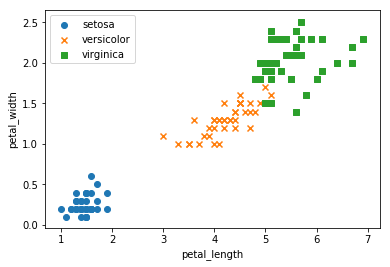

In [43]:
from matplotlib import pyplot as plt


df = pandas.read_csv('./data/iris_train.csv')

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
for specie, marker in zip(['setosa',  'versicolor', 'virginica'], ['o', 'x', 's']):
    sub_df = df[df['species'] == specie]
    subplot.set_xlabel(param_1)
    subplot.set_ylabel(param_2)
    subplot.scatter(x=sub_df[param_1], y=sub_df[param_2], marker=marker, label=specie)
subplot.legend()



In [33]:
import numpy as np
from collections import defaultdict

def _distance(x1, y1, x2, y2):
    return pow((x2-x1)*(x2-x1) + (y2-y1)*(y2-y1), 0.5);

def _predict(sorted_list):
    dct = defaultdict(dict)
    for key in sorted_list.keys():
        dct[key] = sorted_list[key][0]
    ret = None
    for k, v in sorted(dct.items(), key=lambda x: x[1]):
        ret = str(k)
        break
    return ret

def _score(answer, nearlest):
#     if answer == nearlest:
#        count_ok += 1
#     else:
#        count_ng += 1
    count_ok, count_ng = (count_ok + 1, count_ng) if answer == nearlest else (count_ok, count_ng + 1)
    
    
        
    

test_df = pandas.read_csv('./data/iris_test.csv')
result = defaultdict(dict)
for test_length, test_width, test_species in zip(test_df[param_1], test_df[param_2], test_df['species']):
    result_calc = defaultdict(list)
    key = ''
    for train_length, train_width, train_species in zip(df[param_1], df[param_2],df['species']):
        key = train_species
        if train_length == test_length and train_width == test_width:
            continue
        result_calc[train_species].append(_distance(train_length, train_width, test_length, test_width))
    for key in result_calc.keys():
        result_calc[key] = sorted(result_calc[key])
    result[test_species] = result_calc
    _score(test_species, _predict(result_calc))



s = '当たりました ' if answer == nearlest else '外れました'
print('actual: %s, predict: %s, result: %s' % (answer, nearlest, s))
print('■■■■')
print('correct: %s, incorrect: %s' % (count_ok, count_ng))
    


actual: setosa, predict: setosa, result: 当たりました 
actual: versicolor, predict: versicolor, result: 当たりました 
actual: setosa, predict: setosa, result: 当たりました 
actual: setosa, predict: setosa, result: 当たりました 
actual: setosa, predict: setosa, result: 当たりました 
actual: setosa, predict: setosa, result: 当たりました 
actual: setosa, predict: setosa, result: 当たりました 
actual: setosa, predict: setosa, result: 当たりました 
actual: setosa, predict: setosa, result: 当たりました 
actual: setosa, predict: setosa, result: 当たりました 
actual: setosa, predict: setosa, result: 当たりました 
actual: versicolor, predict: versicolor, result: 当たりました 
actual: versicolor, predict: virginica, result: 外れました
actual: versicolor, predict: versicolor, result: 当たりました 
actual: versicolor, predict: versicolor, result: 当たりました 
actual: versicolor, predict: versicolor, result: 当たりました 
actual: versicolor, predict: versicolor, result: 当たりました 
actual: versicolor, predict: versicolor, result: 当たりました 
actual: versicolor, predict: versicolor, result: 当たりました 


In [103]:
def convert(df):
    return  [(l, w, s) for (l, w, s) in zip(df[param_1], df[param_2],df['species'])]

# 最近傍法
#def predict(train_data, dot):
    #return sorted(filter(lambda y: y[0] != 0, list(map(lambda x: (_distance(x[0], x[1], dot[0], dot[1]), x[2]), train_data))), key=lambda x: x[0])[0][1]
    
# KNN
def predict(train_data, dot, k):
    return judge(sorted(filter(lambda y: y[0] != 0, list(map(lambda x: (_distance(x[0], x[1], dot[0], dot[1]), x[2]), train_data))), key=lambda x: x[0])[:k])
    

import collections
def judge(t_l):
    return collections.Counter(list(map(lambda n:n[1], t_l))).most_common(1)[0][0]
    

train_data = convert(df)
test_data = convert(test_df)

summary = [(r[2], p) for p, r in zip(list(map(lambda x: predict(train_data, x, 8), test_data)), test_data)]

for v in summary:
    print('actual: %s, predict: %s, result: %s' % (v[0], v[1], '当たりました' if v[0] == v[1] else '外れました'))

accuracy = len(list(filter(lambda x: x[0] == x[1], summary))) / len(summary)
    
print('accuracy %2.2f' % accuracy)

actual: setosa, predict: setosa, result: 当たりました
actual: versicolor, predict: versicolor, result: 当たりました
actual: setosa, predict: setosa, result: 当たりました
actual: setosa, predict: setosa, result: 当たりました
actual: setosa, predict: setosa, result: 当たりました
actual: setosa, predict: setosa, result: 当たりました
actual: setosa, predict: setosa, result: 当たりました
actual: setosa, predict: setosa, result: 当たりました
actual: setosa, predict: setosa, result: 当たりました
actual: setosa, predict: setosa, result: 当たりました
actual: setosa, predict: setosa, result: 当たりました
actual: versicolor, predict: versicolor, result: 当たりました
actual: versicolor, predict: versicolor, result: 当たりました
actual: versicolor, predict: versicolor, result: 当たりました
actual: versicolor, predict: versicolor, result: 当たりました
actual: versicolor, predict: versicolor, result: 当たりました
actual: versicolor, predict: versicolor, result: 当たりました
actual: versicolor, predict: versicolor, result: 当たりました
actual: versicolor, predict: versicolor, result: 当たりました
actual: versicol